## **YOLO**

>YOLOv8 is the latest version of YOLO by Ultralytics. As a cutting-edge, state-of-the-art (SOTA) model, YOLOv8 builds on the success of previous versions, introducing new features and improvements for enhanced performance, flexibility, and efficiency. YOLOv8 supports a full range of vision AI tasks, including detection, segmentation, pose estimation, tracking, and classification. This versatility allows users to leverage YOLOv8's capabilities across diverse applications and domains.







[YOLOv8](https://docs.ultralytics.com/tasks/) can train, val, predict and export models for the most common tasks in vision AI: [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/).

<img width="1024" src="https://user-images.githubusercontent.com/26833433/212094133-6bb8c21c-3d47-41df-a512-81c5931054ae.png">

#GPU

In [ ]:
!nvidia-smi

/bin/bash: nvidia-smi: command not found


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

''

#Ultralytics YOLOV8


In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 530.4/530.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.5/199.5 kB 23.4 MB/s eta 0:00:00


In [ ]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 23.3/107.7 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Example

In [ ]:
!yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

/bin/bash: yolo: command not found


In [ ]:
!pwd

/content


##Detection

In [ ]:
!yolo task=detect mode=predict model=yolov8n.pt source='/content/images/mqdefault.jpg'

/bin/bash: yolo: command not found


##segmentation

In [ ]:
!yolo task=segment mode=predict model=yolov8n-seg.pt source='/content/images/mqdefault.jpg'

100% 6.73M/6.73M [00:00<00:00, 8.85MB/s]
Ultralytics YOLOv8.0.84 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/cfg/__init__.py", line 391, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/model.py", line 252, in predict
    return self.predictor.predict_cli(source=source) if is_cli else self.predictor(source=source, stream=stream)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/predictor.py", line 162, in predict_cli
    for _ in gen:  # running CLI infe

##Classification

In [ ]:
!yolo task=classify mode=predict model=yolov8n-cls.pt source='/content/det15.jpeg'

2023-04-26 14:42:02.303079: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
YOLOv8n-cls summary (fused): 73 layers, 2715880 parameters, 0 gradients, 4.3 GFLOPs
image 1/1 /content/det15.jpeg: 224x224 milk can 0.00, hair spray 0.00, beaker 0.00, lighter 0.00, cocktail shaker 0.00, 29.9ms
Speed: 0.0ms pre-process, 29.9ms inference, 0.1ms postprocess per image at shape (1, 3, 224, 224)


#Custom Dataset

## **Annotation**

In YOLO (You Only Look Once), annotation refers to the process of labeling the objects in an image or video frame with a bounding box and a class label.

The annotation process involves manually labeling the objects in the image or video frame by drawing a bounding box around each object and assigning it a corresponding class label. For example, in an image of a street scene, cars, pedestrians, and traffic lights might be labeled with bounding boxes and corresponding class labels.

The annotations are typically stored in a specific file format such as the Pascal VOC format or COCO format, which can be read by machine learning algorithms. The annotations are used to train object detection models such as YOLO, which learn to identify objects in new images based on the labeled examples.

The accuracy of the annotations is critical for training effective object detection models. Incorrectly labeled objects or missing annotations can negatively impact the performance of the model. Therefore, the annotation process should be done with care and attention to detail to ensure high-quality labeled data.

**LabelImg**

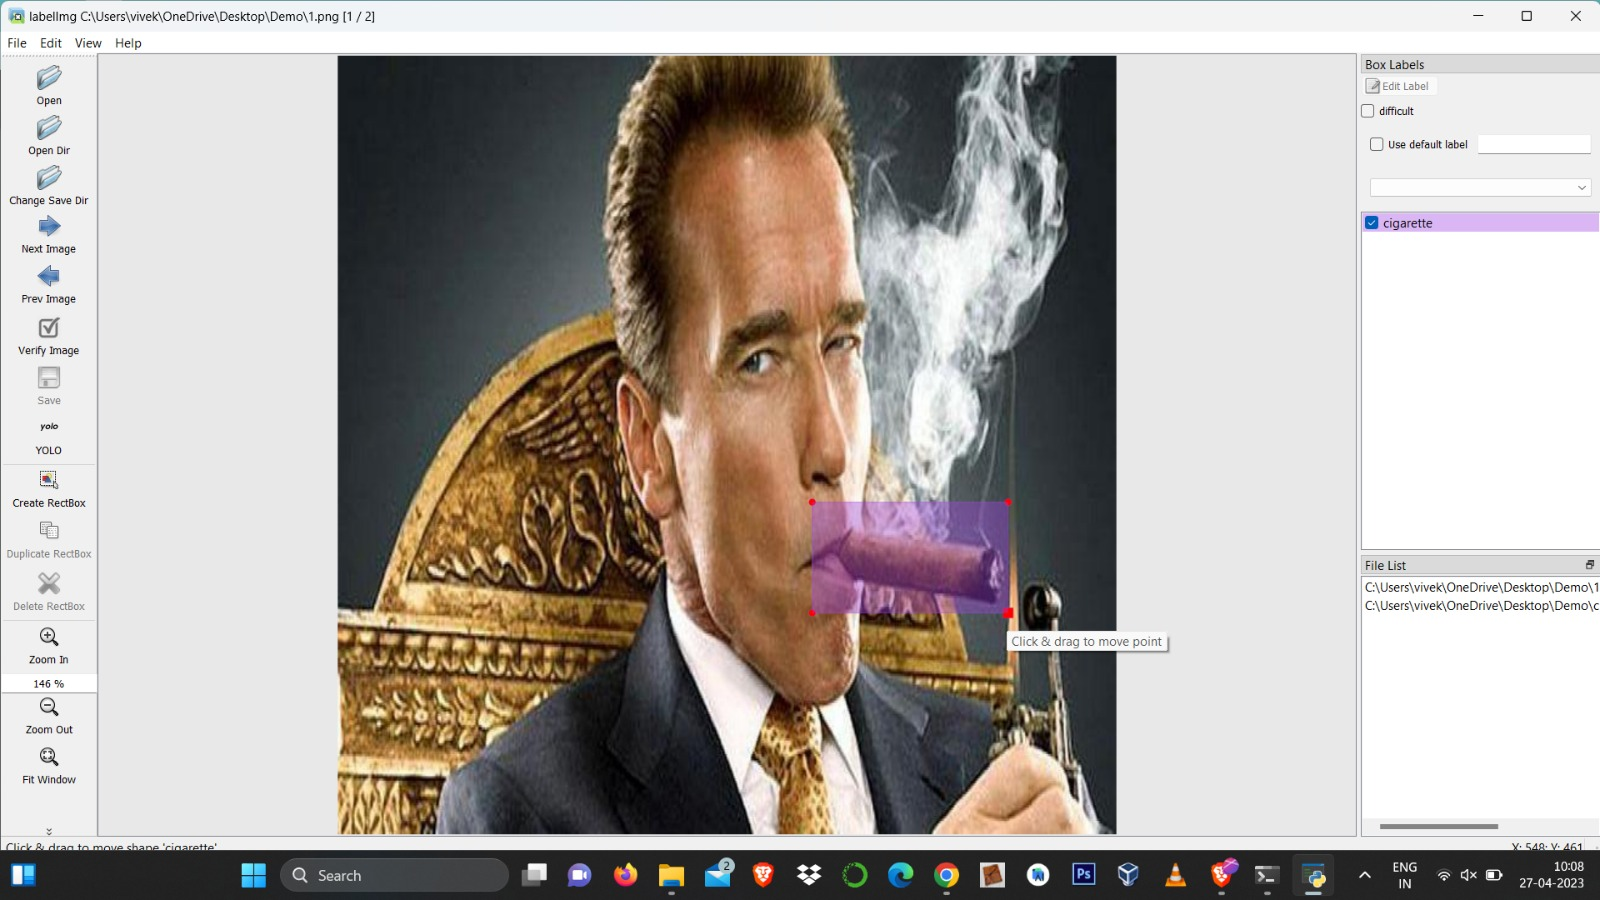

##Mounting google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/

/content/drive/MyDrive


In [ ]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


##Training

In [ ]:
%cd /content/drive/MyDrive/yolov8_smoke/

!yolo task=detect mode=train model=yolov8s.pt data=data.yaml epochs=25 imgsz=640 plots=True

/content/drive/MyDrive/yolov8_smoke
100% 21.5M/21.5M [00:00<00:00, 110MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=25, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, op

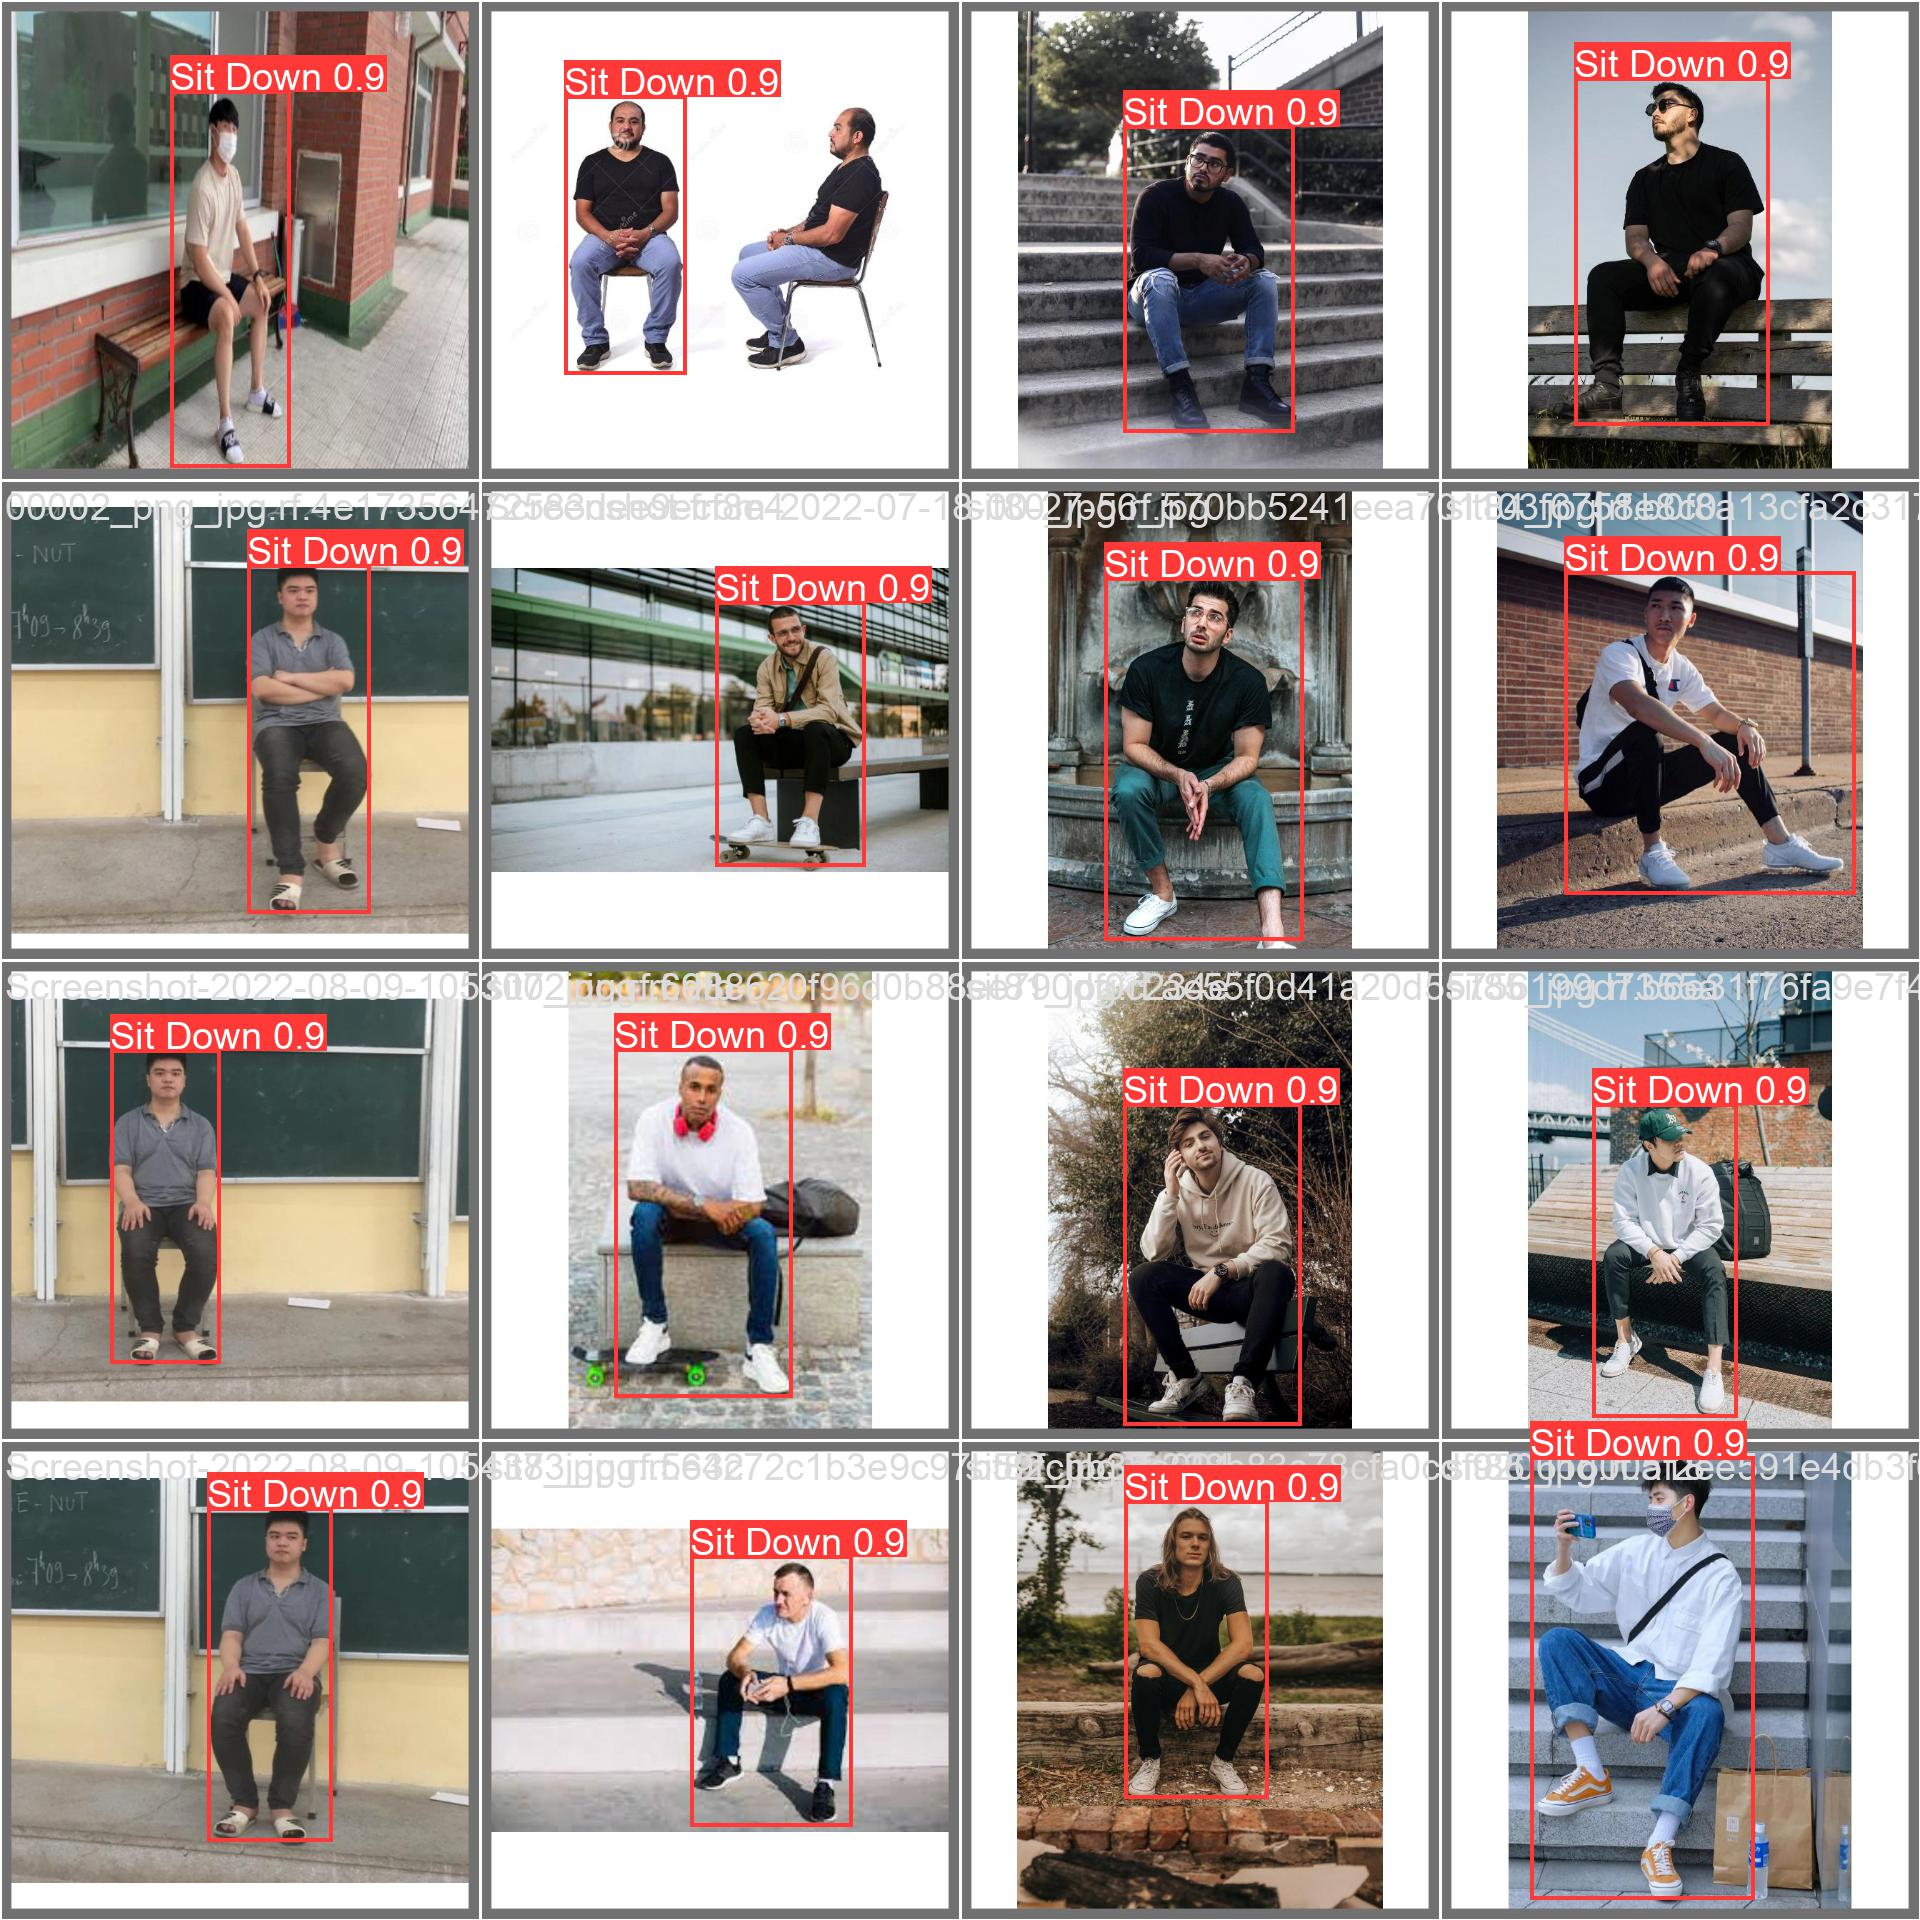

In [ ]:
Image(filename='/content/drive/MyDrive/yolov8_sit/runs/detect/train/val_batch0_pred.jpg',width=600)

##Validation

In [ ]:
!yolo task=detect mode=val model=/content/drive/MyDrive/yolov8_sit/runs/detect/train/weights/best.pt data=data.yaml

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/cfg/__init__.py", line 249, in entrypoint
    getattr(model, mode)(verbose=True, **overrides)
  File "/usr/local/lib/python3.9/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/engine/model.py", line 164, in val
    validator = self.ValidatorClass(args=args)
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/v8/detect/val.py", line 25, in __init__
    self.data_dict = yaml_load(check_file(self.args.data), append_filename=True) if self.args.data else None
  File "/usr/local/lib/python3.9/dist-packages/ultralytics/yolo/utils/checks.py", line 227, in check_file
    raise FileNotFoundError(f"'{file}' does not exist")
FileNotFoundError: 'data.yaml' does not exist
Sentry is attempting to 

##Testing

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8_viol/runs/detect/train3/weights/best.pt conf=0.25 source=/content/drive/MyDrive/yolov8_viol/test/images

2023-04-25 12:50:28.250730: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-25 12:50:29.098625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
image 1/334 /content/drive/MyDrive/yolov8_viol/test/images/NV_118_F28_jpg.rf.b0432d9452c7a41528e17d4bb9d50a69.jpg: 416x416 1 NonViolence, 10.5ms
image 2/334 /content/drive/MyDrive/yolov8_viol/test/images/NV_118_F40_jpg.rf.fee2a2f5c2ef147c4c1afc9e1b59a6c6.jpg: 416x416 1 NonViolence, 10.5ms
image 3/334 /content/drive/MyDrive/yolov8_viol/test/images/NV_118_F60_jpg.rf.b213c85a9757d79bda981b0109c700

#Custom Trained Model

In [ ]:
 model=YOLO("/content/drive/MyDrive/yolov8_viol/runs/detect/train3/weights/best.pt")

In [ ]:
import torch
import numpy as np

# Load the default and custom YOLO weights
default_weights = np.load('/content/drive/MyDrive/yolov8_sit/runs/detect/train/weights/best.pt', allow_pickle=True)
custom_weights = np.load('/content/drive/MyDrive/yolov8_viol/runs/detect/train3/weights/best.pt', allow_pickle=True)

# Concatenate the weight arrays
combined_weights = np.concatenate((default_weights, custom_weights), axis=0)

# Convert the numpy array to a PyTorch tensor
# state_dict = torch.from_numpy(combined_weights)

# Save the combined weights as a new file
np.save('combined_2.weights', combined_weights)
# torch.save(state_dict, 'combined_yolo.pt')


##Saving and loading a model

In [ ]:
import pickle

In [ ]:
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [ ]:
with open('model.pkl', 'rb') as f:
    yoyo= pickle.load(f)

##Prediction on Video

In [ ]:
model.predict("/content/cig_Trim.mp4" , save=True, save_txt=True)

Results saved to runs/detect/predict
60 labels saved to runs/detect/predict/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[6.09000e+02, 1.85000e+02, 7.35000e+02, 3.70000e+02, 3.68739e-01, 1.00000e+00],
         [5.61000e+02, 1.79000e+02, 7.36000e+02, 3.74000e+02, 3.52300e-01, 1.00000e+00]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[6.03000e+02, 1.84000e+02, 7.37000e+02, 3.71000e+02, 4.26993e-01, 1.00000e+00],
         [5.53000e+02, 1.79000e+02, 7.38000e+02, 3.74000e+02, 4.15998e-01, 1.00000e+00]]),
 Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([2, 6])
 dtype: torch.float32
  + tensor([[5.98000e+02, 1.79000e+02, 7.37000e+02, 3.70000e+02, 5.18313e-01, 1.00000e+00],
         [5.34000e+02, 1.77000e+02, 7.46000e+02, 3.79000e+02, 2.92351e-01, 1.00000e+00]])

In [ ]:
!yolo detect predict model="/content/drive/MyDrive/dataset/runs/detect/train5/weights/best.pt" source="/content/ciga.mp4" save=True

2023-04-26 21:46:46.764912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
video 1/1 (1/60) /content/ciga.mp4: 384x640 1 cigarette, 439.4ms
video 1/1 (2/60) /content/ciga.mp4: 384x640 1 cigarette, 404.2ms
video 1/1 (3/60) /content/ciga.mp4: 384x640 1 cigarette, 393.6ms
video 1/1 (4/60) /content/ciga.mp4: 384x640 1 cigarette, 371.3ms
video 1/1 (5/60) /content/ciga.mp4: 384x640 1 cigarette, 384.9ms
video 1/1 (6/60) /content/ciga.mp4: 384x640 1 cigarette, 359.4ms
video 1/1 (7/60) /content/ciga.mp4: 384x640 1 cigarette, 366.9ms
video 1/1 (8/60) /content/ciga.mp4: 384x640 1 cigarette, 392.0ms
video 1/1 (9/60) /content/ciga.mp4: 384x640 1 cigarette, 510.6ms
video 1/1 (10/60) /content/ciga.mp4: 384x640 1 cigarette, 595.0ms
video 1/1 (11/60) /content/ciga.mp4: 384x640 1 cigarette, 597.8ms
video 1/1 (12/60

In [ ]:
!ffmpeg -i {"/content/runs/detect/predict3/ciga.mp4"} -vcodec libx264 {"gods.mp4"}

ffmpeg version 4.2.7-0ubuntu0.1 Copyright (c) 2000-2022 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.4.0-1ubuntu1~20.04.1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-avresample --disable-filter=resample --enable-avisynth --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librsvg --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --e

In [ ]:
# Import the necessary libraries
import io
import base64
from IPython.display import HTML

# Open the video file and read the video data
with io.open('/content/god.mp4', 'r+b') as f:
    video_data = f.read()

# Encode the video data using base64
encoded_video = base64.b64encode(video_data).decode()

# Create the HTML code to display the video
html_code = '''
<video controls alt="test" width="640" height="480" style="max-width:100%;">
    <source src="data:video/mp4;base64,{0}" type="video/mp4" />
</video>
'''.format(encoded_video)

# Display the HTML code to show the video
HTML(html_code)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

# initialize video capture object
cap = cv2.VideoCapture('/content/cig_Trim.mp4')
frame_num=0
# loop through frames
while True:
    # capture frame-by-frame
    ret, frame = cap.read()

    # check if frame was successfully captured
    if not ret:
        break

    # save frame to disk
    filename = 'frame_{}.jpg'.format(frame_num)
    cv2.imwrite(filename, frame)
    model.predict(filename,save=True)
    # increment frame number
    frame_num += 1

    # display frame
    cv2_imshow(frame)

##Prediction on Images

In [ ]:
model.predict("/content/det13.jpeg" , save=True, save_txt=True )

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict4
1 label saved to runs/detect/predict4/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[113.00000,  33.00000, 201.00000, 174.00000,   0.58676,   0.00000]], device='cuda:0')]

In [ ]:
model.predict("/content/det14.jpg" , save=True, save_txt=True )

Results saved to runs/detect/predict4
2 labels saved to runs/detect/predict4/labels


[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[240.00000,  28.00000, 727.00000, 569.00000,   0.84496,   0.00000]], device='cuda:0')]

#webcam

##Webcam pic

In [ ]:
# import dependencies
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
from base64 import b64decode, b64encode
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:
# function to convert the JavaScript object into an OpenCV image
def js_to_image(js_reply):
  """
  Params:
          js_reply: JavaScript object containing image from webcam
  Returns:
          img: OpenCV BGR image
  """
  # decode base64 image
  image_bytes = b64decode(js_reply.split(',')[1])
  # convert bytes to numpy array
  jpg_as_np = np.frombuffer(image_bytes, dtype=np.uint8)
  # decode numpy array into OpenCV BGR image
  img = cv2.imdecode(jpg_as_np, flags=1)

  return img

# function to convert OpenCV Rectangle bounding box image into base64 byte string to be overlayed on video stream
def bbox_to_bytes(bbox_array):
  """
  Params:
          bbox_array: Numpy array (pixels) containing rectangle to overlay on video stream.
  Returns:
        bytes: Base64 image byte string
  """
  # convert array into PIL image
  bbox_PIL = PIL.Image.fromarray(bbox_array, 'RGBA')
  iobuf = io.BytesIO()
  # format bbox into png for return
  bbox_PIL.save(iobuf, format='png')
  # format return string
  bbox_bytes = 'data:image/png;base64,{}'.format((str(b64encode(iobuf.getvalue()), 'utf-8')))

  return bbox_bytes

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)

  # get photo data
  data = eval_js('takePhoto({})'.format(quality))
  # get OpenCV format image
  img = js_to_image(data)
  # grayscale img
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  print(gray.shape)
  # get face bounding box coordinates using Haar Cascade
  # faces = face_cascade.detectMultiScale(gray)
  # draw face bounding box on image
  # for (x,y,w,h) in faces:
  #     img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
  # save image
  model.predict(img, save=True, save_txt =True)
  cv2.imwrite(filename, img)

  return filename

In [ ]:
try:
  filename = take_photo('photo.jpg')
  print('Saved to {}'.format(filename))

  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

<IPython.core.display.Javascript object>

(480, 640)
name 'model' is not defined


##Webcam Video

In [ ]:
# JavaScript to properly create our live video stream using our webcam as input
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;

    var pendingResolve = null;
    var shutdown = false;

    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }

    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }

    async function createDom() {
      if (div !== null) {
        return stream;
      }

      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);

      const modelOut = document.createElement('div');
      modelOut.innerHTML = "<span>Status:</span>";
      labelElement = document.createElement('span');
      labelElement.innerText = 'No data';
      labelElement.style.fontWeight = 'bold';
      modelOut.appendChild(labelElement);
      div.appendChild(modelOut);

      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);

      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);

      const instruction = document.createElement('div');
      instruction.innerHTML =
          '<span style="color: red; font-weight: bold;">' +
          'When finished, click here or on the video to stop this demo</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };

      video.srcObject = stream;
      await video.play();

      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; //video.videoWidth;
      captureCanvas.height = 480; //video.videoHeight;
      window.requestAnimationFrame(onAnimationFrame);

      return stream;
    }
    async function stream_frame(label, imgData) {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }

      var preCreate = Date.now();
      stream = await createDom();

      var preShow = Date.now();
      if (label != "") {
        labelElement.innerHTML = label;
      }

      if (imgData != "") {
        var videoRect = video.getClientRects()[0];
        imgElement.style.top = videoRect.top + "px";
        imgElement.style.left = videoRect.left + "px";
        imgElement.style.width = videoRect.width + "px";
        imgElement.style.height = videoRect.height + "px";
        imgElement.src = imgData;
      }

      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;

      return {'create': preShow - preCreate,
              'show': preCapture - preShow,
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)

def video_frame(label, bbox):
  data = eval_js('stream_frame("{}", "{}")'.format(label, bbox))
  return data

<IPython.core.display.Javascript object>

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11125971 parameters, 0 gradients, 28.4 GFLOPs
Results saved to runs/detect/predict


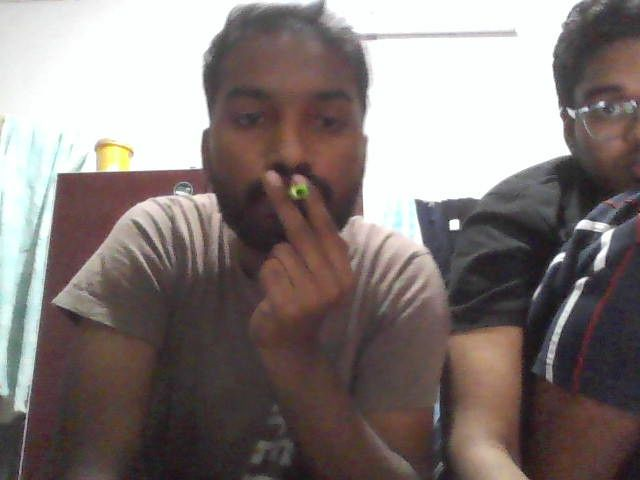

Results saved to runs/detect/predict


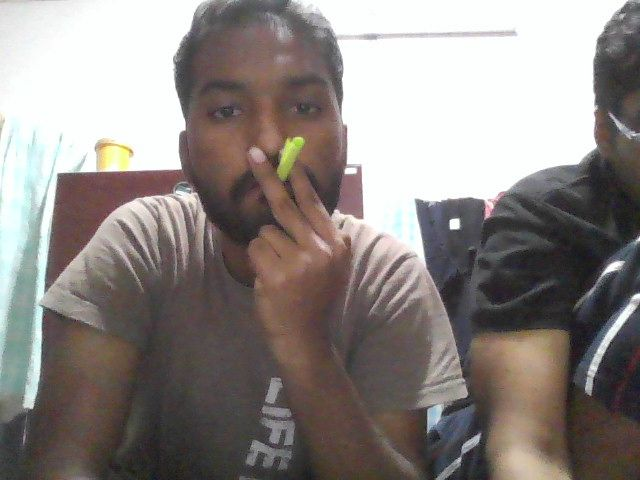

Results saved to runs/detect/predict


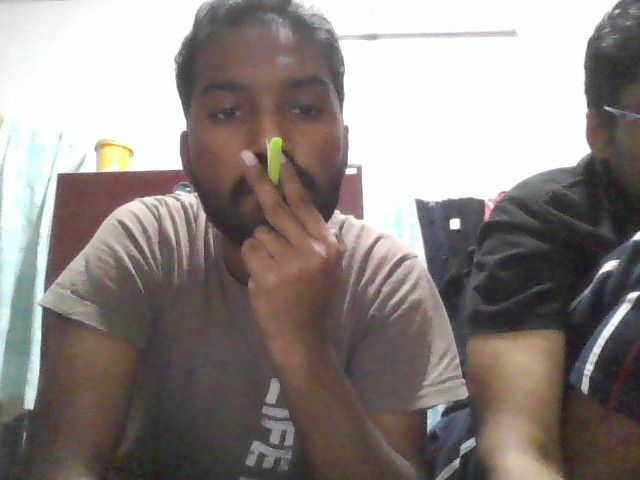

Results saved to runs/detect/predict


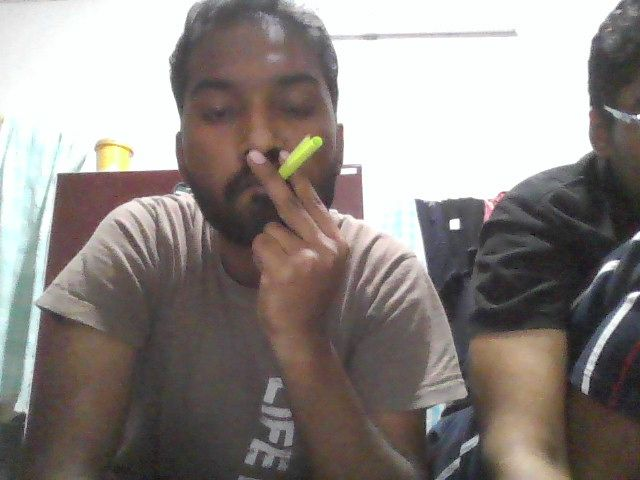

Results saved to runs/detect/predict


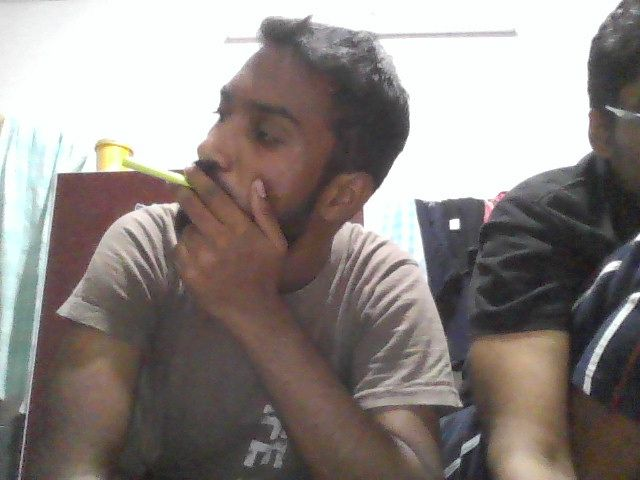

Results saved to runs/detect/predict


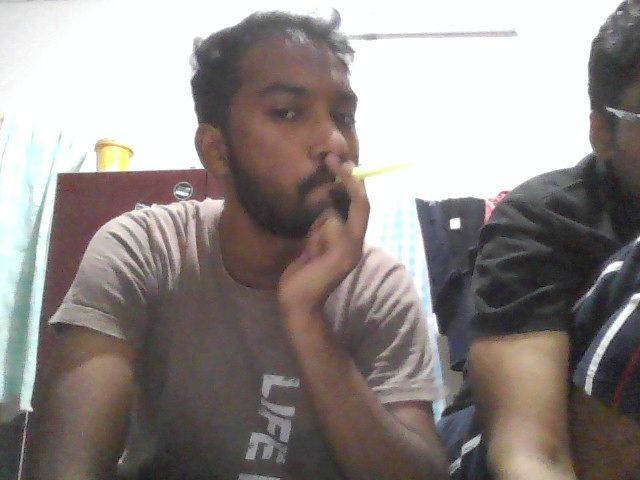

Results saved to runs/detect/predict


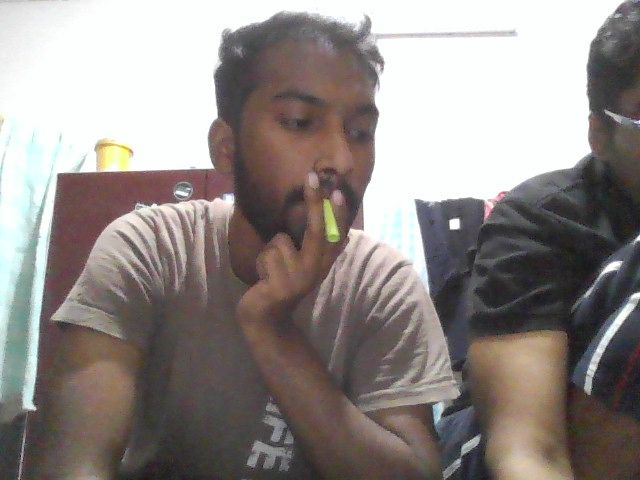

Results saved to runs/detect/predict


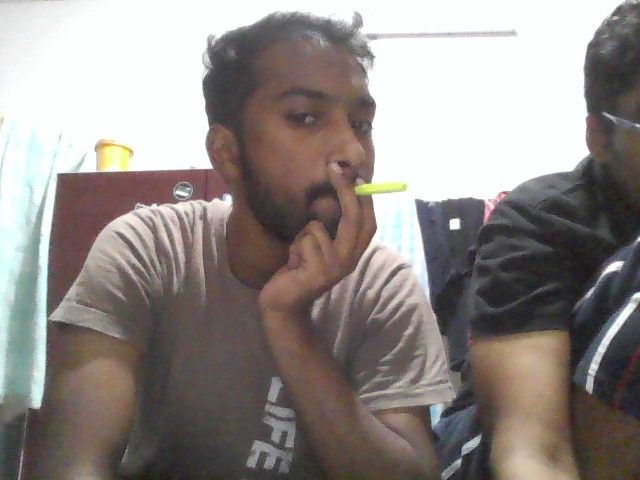

In [ ]:
# start streaming video from webcam
video_stream()
# label for video
label_html = 'Capturing...'
# initialze bounding box to empty
bbox = ''
count = 0
frame_num=0
while True:
    js_reply = video_frame(label_html, bbox)

    if not js_reply:
        break

    # convert JS response to OpenCV Image
    img = js_to_image(js_reply["img"])
    frame = img
    filename = 'frame_{}.jpg'.format(frame_num)
    cv2.imwrite(filename, frame)
    model.predict(filename,save=True)
    # increment frame number
    frame_num += 1

    # display frame
    cv2_imshow(frame)


#Alert

In [ ]:
%cd /content

/content


In [ ]:
import requests
def telegrammsg(bot_message):

  bot_token='5902344528:AAFAUovWtPNfcEwknWZhjayWc3jWHE9jwbk'
  bot_chatID = '1429946114'
  send_text= 'https://api.telegram.org/bot' + bot_token + '/sendMessage?chat_id=' + bot_chatID + \
              '&parse_mode=MarkdownV2&text=' + bot_message

  response = requests.get(send_text)

  return response.json()

In [ ]:
def telegram(bot_token, bot_chatID, photo_path, caption=None):
    """
    Send a photo to a Telegram chat using the Telegram Bot API.

    Args:
        bot_token (str): The access token for the Telegram bot.
        bot_chatID (str): The chat ID of the chat that the bot will send the photo to.
        photo_path (str): The path to the photo file on the local filesystem.
        caption (str, optional): The caption for the photo.

    Returns:
        dict: The JSON response from the Telegram API.
    """
    url = f"https://api.telegram.org/bot{bot_token}/sendPhoto"
    files = {"photo": open(photo_path, "rb")}
    data = {"chat_id": bot_chatID}
    if caption:
        data["caption"] = caption
    response = requests.post(url, files=files, data=data)
    return response.json()

In [ ]:
pp = '/content/det.jpg'

In [ ]:
model.predict(pp, save=True, save_txt=True)

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-2.0.0+cu118 CPU
Model summary (fused): 168 layers, 11126358 parameters, 0 gradients, 28.4 GFLOPs
Exception in thread Thread-14:
Traceback (most recent call last):
  File "/usr/local/lib/python3.9/dist-packages/requests/models.py", line 910, in json
    return complexjson.loads(self.text, **kwargs)
  File "/usr/lib/python3.9/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.9/json/decoder.py", line 337, in decode
    obj, end = self.raw_decode(s, idx=_w(s, 0).end())
  File "/usr/lib/python3.9/json/decoder.py", line 355, in raw_decode
    raise JSONDecodeError("Expecting value", s, err.value) from None
json.decoder.JSONDecodeError: Expecting value: line 2 column 1 (char 1)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/python3.9/threading.py", line 980, in _bootstrap_inner
    self.run()
  File "/usr/local/lib/python3.

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([1, 6])
 dtype: torch.float32
  + tensor([[ 67.00000,   2.00000, 493.00000, 459.00000,   0.84109,   1.00000]])]

In [ ]:
def func(bot_token,bot_chat_id,pp,num):
    if num==0:
      caption="Violence detected"
    elif num==1:
      caption="Smoking Detected"
    return telegram(bot_token,bot_chat_id,pp,caption)


In [ ]:
%cd /content/runs/detect/predict/

/content/runs/detect/predict


In [ ]:
with open('labels/det3.txt', 'r') as file:
    data = file.readlines()
    numbers = [str(num) for num in data]
numbers

In [ ]:
func('5902344528:AAFAUovWtPNfcEwknWZhjayWc3jWHE9jwbk','1429946114' ,'runs/detect/predict/det.jpg', 0)

{'ok': True,
 'result': {'message_id': 14,
  'from': {'id': 5902344528,
   'is_bot': True,
   'first_name': 'YOLObot',
   'username': 'yoloalertbot'},
  'chat': {'id': 1429946114,
   'first_name': 'Rama Kiran',
   'last_name': 'Nittala',
   'type': 'private'},
  'date': 1682580513,
  'photo': [{'file_id': 'AgACAgUAAxkDAAMOZEokIR3FuBOPyLBWvW6Y7kBMbgQAAiq2MRvLQFBWyNL1k8auHC8BAAMCAANzAAMvBA',
    'file_unique_id': 'AQADKrYxG8tAUFZ4',
    'file_size': 1508,
    'width': 90,
    'height': 67},
   {'file_id': 'AgACAgUAAxkDAAMOZEokIR3FuBOPyLBWvW6Y7kBMbgQAAiq2MRvLQFBWyNL1k8auHC8BAAMCAANtAAMvBA',
    'file_unique_id': 'AQADKrYxG8tAUFZy',
    'file_size': 19928,
    'width': 320,
    'height': 240},
   {'file_id': 'AgACAgUAAxkDAAMOZEokIR3FuBOPyLBWvW6Y7kBMbgQAAiq2MRvLQFBWyNL1k8auHC8BAAMCAAN4AAMvBA',
    'file_unique_id': 'AQADKrYxG8tAUFZ9',
    'file_size': 47614,
    'width': 612,
    'height': 459}],
  'caption': 'Violence detected'}}